In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [3]:
Stock = pd.read_csv('AMZN.csv',index_col=0)
df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-18,165.00,165.19,161.82,163.56,6331300,3.770297,164.383594,149.302406,164.64,155.53,...,45.335,44.8280,42.6302,1184.71,1176.19,1165.32,11143.69,11062.78,11010.34,158.67
2010-10-19,160.68,162.80,157.00,158.67,7525000,3.501162,164.242324,150.237676,163.56,164.64,...,45.440,44.9185,42.6998,1165.90,1184.71,1169.77,10978.62,11143.69,11020.40,158.67
2010-10-20,158.78,159.87,156.57,158.67,5790400,3.271424,164.124849,151.039151,158.67,163.56,...,45.617,45.0315,42.7834,1178.17,1165.90,1178.10,11107.97,10978.62,11096.08,164.97
2010-10-21,162.67,166.13,161.29,164.97,13482500,3.465530,165.119061,151.256939,158.67,158.67,...,45.787,45.1500,42.8918,1180.26,1178.17,1173.81,11146.57,11107.97,11094.57,169.13
2010-10-22,162.45,170.17,162.27,169.13,16318400,4.217293,167.042587,150.173413,164.97,158.67,...,45.958,45.2395,43.0130,1183.08,1180.26,1176.19,11132.56,11146.57,11062.78,169.00


In [10]:
df_Stock.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

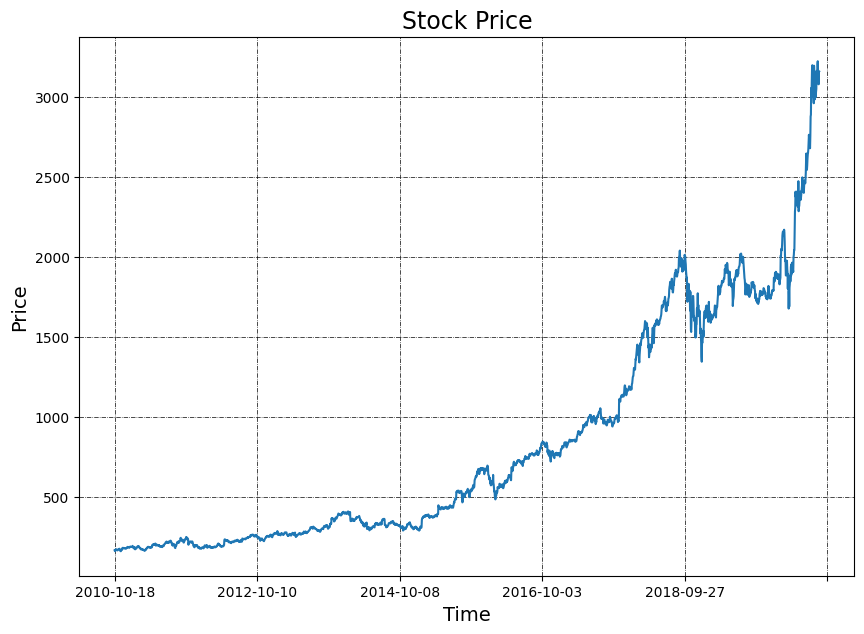

In [9]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [20]:
df_Stock = df_Stock.drop(columns='Date_col')


In [22]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [23]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  2473
Training Set length -  2176
Validation Set length -  247
Test Set length -  49
(2176, 61) (247, 61) (50, 61)
(2176,) (247,) (50,)


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [26]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-6.78143723e-02  2.30666198e-02  1.73966159e-01  1.22625861e+00
 -9.28010620e-08  1.28067664e-02 -6.03703171e-02 -1.11597244e-01
  1.02765293e-01  7.59252116e-02  1.01304348e-02 -8.73943899e-02
  6.56349351e-02  7.33302559e-01  2.73954660e-01 -8.59837702e-02
  6.18425695e-02  5.09197797e-03 -2.69918505e-01 -2.69918505e-01
 -2.69918505e-01 -2.69918505e-01 -2.69918505e-01 -2.00895204e+00
  1.82582287e+00 -5.58420221e-02 -1.82538293e-02  1.37173584e-09
  2.47946064e-03 -1.05711810e-02  1.90381636e-02  1.90381635e-02
 -3.68155878e+01 -3.58542496e-09  4.13015305e-09 -3.02818630e-01
 -4.25342323e-01  3.70885022e-01 -1.18769428e-01 -2.29437612e+00
  2.25635318e+00  3.35141735e+00 -2.47565852e+00 -5.38106074e+00
  6.57252031e-14 -1.51979118e+00  1.98006541e+00 -1.07907893e+01
  5.09986372e-01  1.93166609e-01  3.64403746e-01  2.01048744e+00
 -3.74293602e+00  1.06226619e+00 -2.02072112e-01  5.66794700e-02
 -3.90376874e-03 -8.55181064e-02 -7.84456082e-03  4.56897767e-03
  5.42

In [27]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9990971601972322


In [30]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.41
Training Mean Squared Error: 250.05
Training RMSE:  15.81
Training MAE:  8.67
 
Validation R-squared:  0.97
Validation Explained Variation:  0.97
Validation MAPE: 1.36
Validation Mean Squared Error: 250.05
Validation RMSE:  39.62
Validation MAE:  26.78
 
Test R-squared:  0.91
Test Explained Variation:  0.92
Test MAPE: 1.76
Test Mean Squared Error: 4712.74
Test RMSE:  68.65
Test MAE:  51.81


In [34]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2019-06-12 00:00:00,1870.30,1862.599666
1,2019-06-13 00:00:00,1869.67,1876.061671
2,2019-06-14 00:00:00,1886.03,1872.617673
3,2019-06-17 00:00:00,1901.37,1884.383332
4,2019-06-18 00:00:00,1908.79,1895.656361
5,2019-06-19 00:00:00,1918.19,1901.639372
6,2019-06-20 00:00:00,1911.30,1911.039448
7,2019-06-21 00:00:00,1913.90,1909.450818
8,2019-06-24 00:00:00,1878.27,1912.493674
9,2019-06-25 00:00:00,1897.83,1879.969971


<AxesSubplot:>

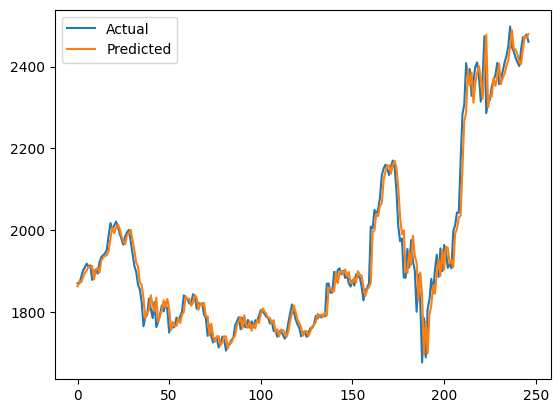

In [35]:
df_pred[['Actual', 'Predicted']].plot()
